In [1]:
#"C:\Users\abhin\OneDrive\Desktop\DATA\HousingData.csv"
#import sys
#!{sys.executable} -m pip install xgboost

In [2]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection  import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [3]:
house_price_dataset = pd.read_csv(r"C:\Users\abhin\OneDrive\Desktop\DATA\HousingData.csv")
house_price_dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [4]:


nan_rows = house_price_dataset[house_price_dataset.isna().any(axis=1)]
print(nan_rows)
nan_rows.shape

         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
4     0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222   
6     0.08829  12.5   7.87   NaN  0.524  6.012  66.6  5.5605    5  311   
9     0.17004  12.5   7.87   NaN  0.524  6.004  85.9  6.5921    5  311   
14    0.63796   0.0   8.14   NaN  0.538  6.096  84.5  4.4619    4  307   
35    0.06417   0.0   5.96   0.0  0.499  5.933  68.2  3.3603    5  279   
..        ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
473   4.64689   0.0  18.10   0.0  0.614  6.980  67.6  2.5329   24  666   
479  14.33370   0.0  18.10   NaN  0.614  6.229  88.0  1.9512   24  666   
482   5.73116   0.0  18.10   NaN  0.532  7.061  77.0  3.4106   24  666   
501   0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786    1  273   
505   0.04741   0.0  11.93   0.0  0.573  6.030   NaN  2.5050    1  273   

     PTRATIO       B  LSTAT  MEDV  
4       18.7  396.90    NaN  36.2  
6       15.2  395.60  12.43  22.9  
9  

(112, 14)

In [5]:
house_price_dataset.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

DATA CLEANING FOR THE HOUSE PRICE DATASET

In [6]:
print("Missing values before imputation:\n", house_price_dataset.isnull().sum()[house_price_dataset.isnull().sum() > 0])



Missing values before imputation:
 CRIM     20
ZN       20
INDUS    20
CHAS     20
AGE      20
LSTAT    20
dtype: int64


In [7]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')


housepricedataset_imputed = pd.DataFrame(imputer.fit_transform(house_price_dataset), columns=house_price_dataset.columns)


print("\nMissing values after imputation:\n", housepricedataset_imputed.isnull().sum().sum())


Missing values after imputation:
 0


In [8]:
housepricedataset_imputed.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [9]:
housepricedataset_imputed.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.479140,10.768775,11.028893,0.067194,0.554695,6.284634,68.845850,3.795043,9.549407,408.237154,18.455534,356.674032,12.664625,22.532806
std,8.570832,23.025124,6.704679,0.250605,0.115878,0.702617,27.486962,2.105710,8.707259,168.537116,2.164946,91.294864,7.017219,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.083235,0.000000,5.190000,0.000000,0.449000,5.885500,45.925000,2.100175,4.000000,279.000000,17.400000,375.377500,7.230000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,2.808720,0.000000,18.100000,0.000000,0.624000,6.623500,93.575000,5.188425,24.000000,666.000000,20.200000,396.225000,16.570000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [10]:
correlation = housepricedataset_imputed.corr()

Constructing a heatmap to understand the correlation

<Axes: >

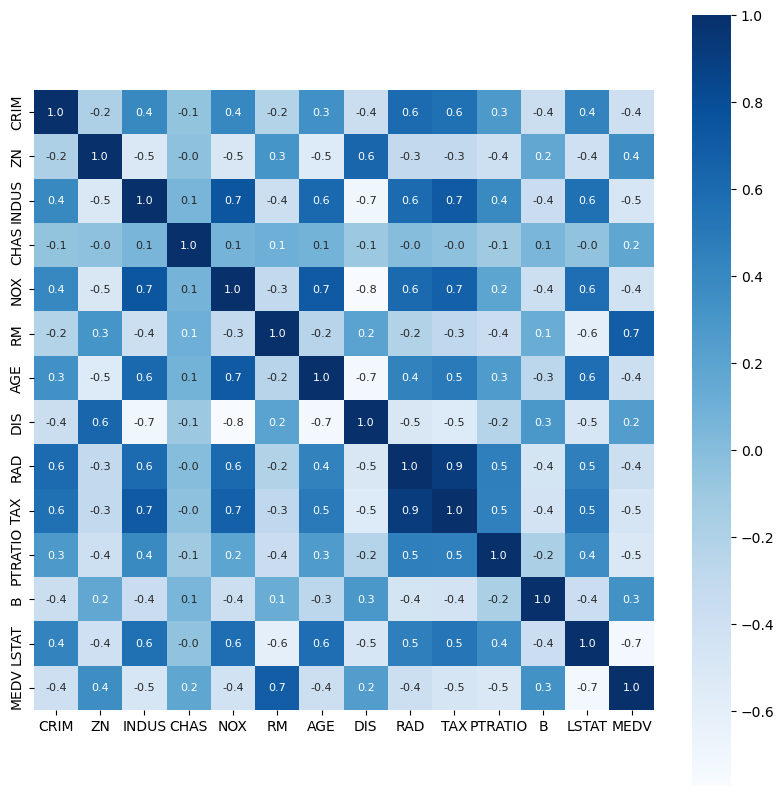

In [11]:
plt.figure(figsize= (10,10))
sns.heatmap(correlation, cbar = True, square = True, fmt ='.1f', annot = True, annot_kws ={'size':8}, cmap='Blues' , xticklabels = True)

In [13]:
X = housepricedataset_imputed.drop(columns = ['MEDV'] , axis = 1)
Y = housepricedataset_imputed['MEDV']
print(X)
print(Y)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  76.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       1

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [18]:
print(X.shape, X_train.shape, X_test.shape)

(506, 13) (404, 13) (102, 13)


In [19]:
model = XGBRegressor()
model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [22]:
training_data_prediction = model.predict(X_train)
training_data_prediction

array([23.124718 , 21.00754  , 20.102568 , 34.69276  , 13.904569 ,
       13.49714  , 21.997927 , 15.19248  , 10.902376 , 22.7026   ,
       13.800668 ,  5.5908513, 29.806072 , 50.005272 , 34.89682  ,
       20.596664 , 23.386295 , 19.18905  , 32.691494 , 19.63137  ,
       26.9884   ,  8.40349  , 46.001217 , 21.7111   , 27.08755  ,
       19.365828 , 19.286129 , 24.817802 , 22.611925 , 31.707855 ,
       18.541298 ,  8.704057 , 17.404493 , 23.701723 , 13.304713 ,
       10.520918 , 12.70769  , 24.98351  , 19.686928 , 14.899053 ,
       24.209797 , 24.994987 , 14.897052 , 17.01417  , 15.603933 ,
       12.6952915, 24.52194  , 15.007025 , 49.999977 , 17.510012 ,
       21.203285 , 32.003624 , 15.595356 , 22.898546 , 19.32731  ,
       18.687641 , 23.30319  , 37.200005 , 30.095251 , 33.104855 ,
       20.992231 , 50.002266 , 13.401404 ,  5.007679 , 16.5074   ,
        8.395711 , 28.68154  , 19.493786 , 20.596518 , 45.400917 ,
       39.804905 , 33.41812  , 19.840513 , 33.39644  , 25.2710

In [23]:
# R_squared_error
score_1 = metrics.r2_score(y_train, training_data_prediction)
# Mean-Absolute Error
score_2 = metrics.mean_absolute_error(y_train, training_data_prediction)
print("R_squared_error = " + str(score_1))
print("Mean_Absolute_Error = "+ str(score_2))

R_squared_error = 0.9999970846673867
Mean_Absolute_Error = 0.010642476601175762


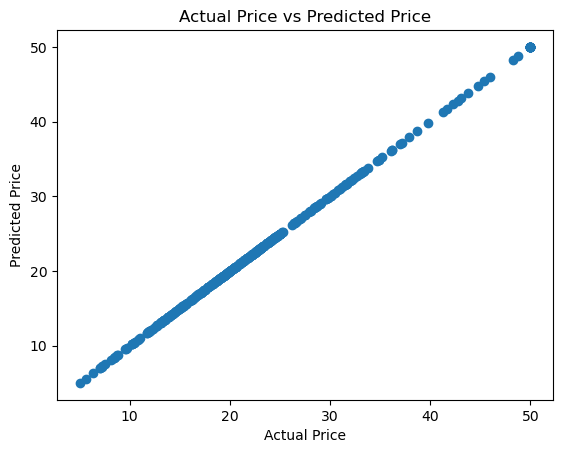

In [27]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()


In [25]:
testing_data_prediction = model.predict(X_test)
testing_data_prediction

array([20.707636 , 20.860825 , 30.760574 , 28.943205 , 10.297101 ,
       14.105895 , 28.633337 , 29.647547 , 15.226431 , 21.316574 ,
       24.364462 , 25.870434 , 19.460451 , 20.717276 , 24.605297 ,
       22.203043 , 18.789381 , 10.021047 ,  8.55487  , 14.677889 ,
       22.55176  , 19.862167 , 33.81189  , 18.128134 , 11.577411 ,
       18.11873  , 46.394855 , 33.50774  , 32.910786 , 16.669798 ,
       16.289019 , 19.06824  , 29.699427 , 24.061516 , 10.271432 ,
       17.748257 ,  7.872007 , 20.951927 , 21.554213 , 21.521666 ,
       25.42696  , 13.903953 , 27.308712 ,  8.132059 , 19.446428 ,
       14.773386 , 34.67121  , 15.380095 , 29.413876 , 13.919542 ,
       30.979235 , 29.046677 ,  7.0046916, 33.54651  , 23.99044  ,
       19.915869 , 19.531233 , 20.122433 , 15.648349 , 22.410732 ,
       20.68123  , 23.131214 , 17.813044 , 27.834852 , 32.95065  ,
       25.603788 , 49.685944 , 30.87739  , 10.658959 , 24.356308 ,
       14.958828 ,  9.017352 , 15.004396 , 18.808577 , 26.1185

In [26]:
score_1 = metrics.r2_score(y_test, testing_data_prediction)
# Mean-Absolute Error
score_2 = metrics.mean_absolute_error(y_test, testing_data_prediction)
print("R_squared_error = " + str(score_1))
print("Mean_Absolute_Error = "+ str(score_2))

R_squared_error = 0.8950119616414808
Mean_Absolute_Error = 2.2481449632083668


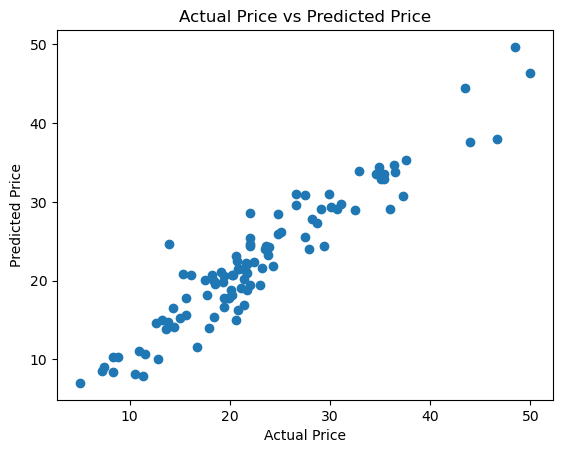

In [28]:
plt.scatter(y_test, testing_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()
